In [0]:
import numpy as np

In [0]:
def distance(a, b):
    return np.sum(np.abs(a - b))

In [0]:
def min_dist(a):
    return np.argmin([distance(a, C[i]) for i in range(3)])

In [0]:
def assign_clusters(L):
    return np.array([min_dist(x) for x in L])

In [0]:
def get_clusters(arr):
    return [np.where(arr == i)[0] for i in range(3)]

In [0]:
def get_means(arr):
    return [np.mean(x[i], axis=0) for i in arr]

In [0]:
x = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
C = np.array([[2, 10], [5, 8], [1, 2]])

In [0]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [0]:
rc('animation', html='html5')

In [0]:
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]

In [0]:
assign_clusters(x)

array([0, 2, 1, 1, 1, 1, 2, 1])

In [0]:
def step():
    global C, clusters
    clusters = get_clusters(assign_clusters(x))
    C = get_means(clusters)
    #print(C)

[array([ 2., 10.]), array([6., 6.]), array([1.5, 3.5])]
[0 2 1 1 1 1 2 0]
[array([3. , 9.5]), array([6.5 , 5.25]), array([1.5, 3.5])]
[0 2 1 0 1 1 2 0]
[array([3.66666667, 9.        ]), array([7.        , 4.33333333]), array([1.5, 3.5])]
[0 2 1 0 1 1 2 0]


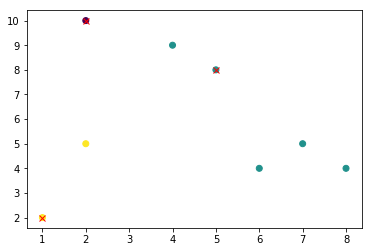

In [0]:
x = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
C = np.array([[2, 10], [5, 8], [1, 2]])

fig = plt.figure()
paths = plt.scatter(x.T[0], x.T[1], c=[colors[i] for i in assign_clusters(x)], cmap='hsv')
scat, = plt.plot(C.T[0], C.T[1],'rx')
plt.close()

def init():
    x = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
    C = np.array([[2, 10], [5, 8], [1, 2]])
    paths = plt.scatter(x.T[0], x.T[1], c=assign_clusters(x))
    scat = plt.plot(C.T[0], C.T[1],'rx')
    return paths,

def animate(i):
    step()
    print(C)
    print(assign_clusters(x))
    #paths.set_color([colors[i] for i in assign_clusters(x)])
    paths.set_array(assign_clusters(x))
    scat.set_data(np.array(C).T[0], np.array(C).T[1])
    return paths,

animation.FuncAnimation(fig, animate, range(3), interval=2000, init_func=init)